In [52]:
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import re 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Infotech\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
data=pd.read_csv('D:\spam.csv',encoding='latin-1')
data.head(15).style.background_gradient(cmap='Reds')

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",nan,nan,nan
1,ham,Ok lar... Joking wif u oni...,nan,nan,nan
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,nan,nan,nan
3,ham,U dun say so early hor... U c already then say...,nan,nan,nan
4,ham,"Nah I don't think he goes to usf, he lives around here though",nan,nan,nan
5,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",nan,nan,nan
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.,nan,nan,nan
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,nan,nan,nan
8,spam,WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.,nan,nan,nan
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030,nan,nan,nan


In [54]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [55]:
cl=['Unnamed: 2' ,'Unnamed: 3','Unnamed: 4']
data.drop(columns=cl,inplace=True)

In [56]:
data.head(10).style.background_gradient(cmap='Reds')

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
5,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8,spam,WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030


In [57]:
new_names={"v1":"category","v2":"message"}
data.rename(columns=new_names,inplace=True)


In [58]:
data.head(10).style.background_gradient(cmap='Reds')

,category,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
5,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8,spam,WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030


In [59]:
data.loc[data["category"]=="spam","category"]=0
data.loc[data["category"]=="ham","category"]=1

In [60]:
data.head(10).style.background_gradient(cmap='Reds')

,category,message
0,1,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives around here though"
5,0,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"
6,1,Even my brother is not like to speak with me. They treat me like aids patent.
7,1,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8,0,WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
9,0,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030


<Axes: xlabel='category'>

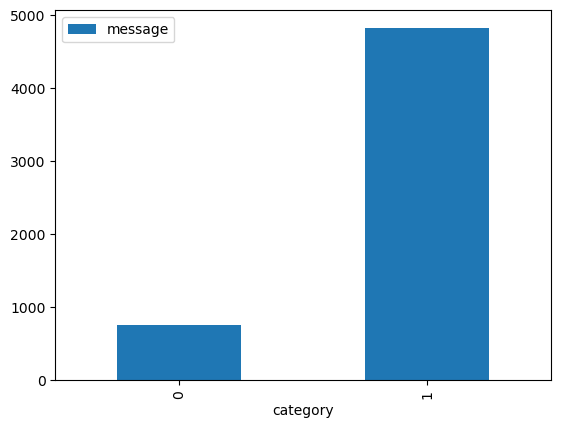

In [61]:
count=data.groupby(by=['category']).count()
count.plot(kind='bar')

In [62]:
corpus= []
ps= PorterStemmer()

for i in range(0,data.shape[0]):
    message = re.sub(pattern='[^a-zA-Z]' , repl=' ' , string = data.message[i])
    message = message.lower()
    words = message.split()
    words = [word for word in words if word not in set(stopwords.words('english'))]
    words = [ps.stem(word) for word in words]
    message = ' '.join(words)
    corpus.append(message)
    

In [63]:
def clean_text(X):
    message = re.sub(pattern='[^a-zA-Z]' , repl=' ' , string =x)
    message = message.lower()
    words = message.split()
    words = [word for word in words if word not in set(stopwords.words('english'))]
    words = [ps.stem(word) for word in words]
    message = ' '.join(words)
    return message 
    

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [65]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [66]:
y = pd.get_dummies(data['category'])
y = y.iloc[:,1].values

In [67]:
y

array([1, 1, 0, ..., 1, 1, 1], dtype=uint8)

In [68]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,mean_absolute_error,roc_auc_score,confusion_matrix
import scikitplot as skplt

In [69]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2 , random_state=10)


In [70]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4457, 2500)
(1115, 2500)
(4457,)
(1115,)


In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
LG = LogisticRegression()
LG = LG.fit(X_train,Y_train)

In [73]:
y_pred = LG.predict(X_test)
print("The accuracy is",accuracy_score(y_pred,Y_test)*100)
print("The mean_absolute_error is ",mean_absolute_error(Y_test,y_pred))

The accuracy is 98.02690582959642
The mean_absolute_error is  0.47533632286995514


In [74]:
confusion_matrix(Y_test,y_pred)

array([[130,  20],
       [  2, 963]], dtype=int64)

<Axes: >

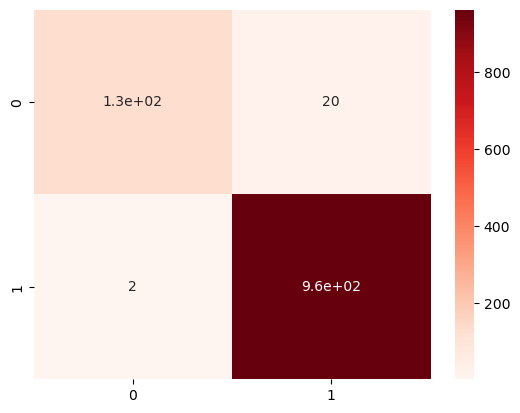

In [75]:
sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True,cmap='Reds')

0.9949706390328152


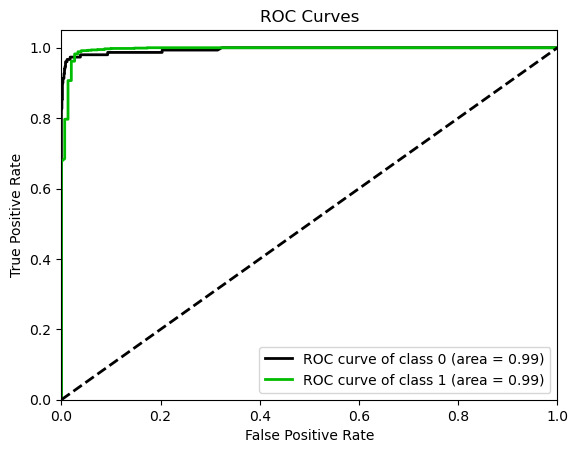

In [76]:
Y_pred_prob=LG.predict_proba(X_test)
class_1_prob=list()
for i in Y_pred_prob:
    class_1_prob.append(i[1])
print(roc_auc_score(Y_test,class_1_prob))
skplt.metrics.plot_roc_curve(Y_test,Y_pred_prob,curves=['each_class'])
plt.show()

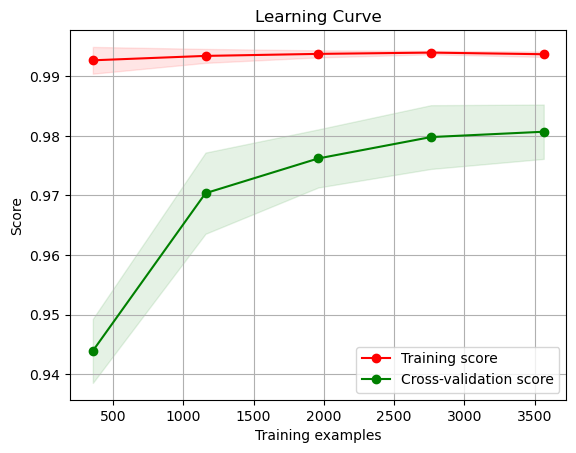

In [77]:
skplt.estimators.plot_learning_curve(LG,X_train,Y_train)
plt.show()